### Workshop : Convolution

Convolution, Kernel, Pooling

In [30]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

### Convolution & Kernel

In [31]:
image = np.array([[1, 0, 2, 1, 0], # ข้อมูลใน Pixel ภาพ (สมมุติ)
                  [0, 2, 3, 0, 1],
                  [1, 0, 1, 1, 2],
                  [0, 2, 2, 0, 3],
                  [0, 4, 1, 2, 0]])

image = image / 5.0  # ทำ Normalize ให้ได้ค่าสีใน Pixel อยู่ในช่วง 0 - 1
image

array([[0.2, 0. , 0.4, 0.2, 0. ],
       [0. , 0.4, 0.6, 0. , 0.2],
       [0.2, 0. , 0.2, 0.2, 0.4],
       [0. , 0.4, 0.4, 0. , 0.6],
       [0. , 0.8, 0.2, 0.4, 0. ]])

In [32]:
np.max(image)

0.8

In [33]:
# สร้าง Kernel (filter, mask)
kernel1 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

im2 = cv2.filter2D(src=image, ddepth = -1, kernel = kernel1)

In [34]:
im2_int = (im2*5).astype('int')
im2_int

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

### Convolution

In [35]:
# from google.colab import drive 
# drive.mount('/content/drive')

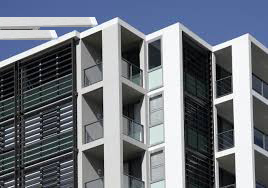

In [36]:
import numpy as np 
from PIL import Image, ImageOps

imgfile = 'data/building1.jpg'

image = Image.open(imgfile) #.convert('L')
image

### Kernel

In [ ]:
kernel1 = np.array([[-1, 0, 1],   # verticle
                    [-3, 0, 3],
                    [-1, 0, 1]])

In [ ]:
kernel1 = np.array([[-1, -3, -1],   # h
                    [0, 0, 0],
                    [1, 3, 1]])

In [40]:
kernel1 = np.array([[0, 1, 3],   # \
                    [-1, 0, 1],
                    [-3, -1, 0]])

In [44]:
kernel1 = np.array([[-3, -1, 0],   # /
                    [-1, 0, 1],
                    [0, 1, 3]])

In [47]:
kernel1 = np.array([[-1, -1, -1],   # edge
                    [-1, 8, -1],
                    [-1, -1, -1]])

### Convolution2D

In [48]:
from PIL import Image, ImageOps

pixel = np.array(image) #เปลี่ยนภาพให้เป็น array ก่อน
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernel1)

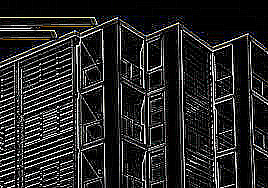

In [49]:
Image.fromarray(fea_map)

In [ ]:
plt.imshow(fea_map, cmap=plt.cm.gray)
plt.show()

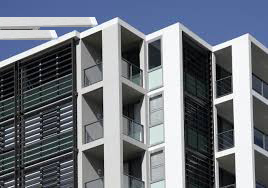

In [43]:
image

### Pooling

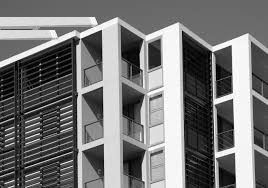

In [50]:
from PIL import Image, ImageOps

imgfile = 'data/building1.jpg'

image = Image.open(imgfile).convert('L')
image

In [51]:
pixel = np.array(image)
pixel.shape

(188, 268)

1/1 [==============================] - 3s 3s/step


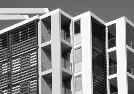

In [52]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

arr = pixel.reshape(1, 188, 268, 1)

model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))

output = model.predict(arr)

output = np.squeeze(output)
Image.fromarray(output)

In [53]:
output.shape

(94, 134)

1/1 [==============================] - 0s 138ms/step


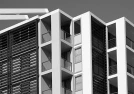

In [55]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D
from PIL import Image, ImageOps 

pixel2 = pixel.astype('float')
arr = pixel2.reshape(1, 188, 268, 1)

model = Sequential()
model.add(AveragePooling2D(pool_size=(2, 2)))

output = model.predict(arr).astype('uint8')

output = np.squeeze(output)
Image.fromarray(output)

In [56]:
output.shape

(94, 134)

In [57]:
output

array([[ 95,  95,  95, ..., 103, 103, 103],
       [ 95,  95,  95, ..., 103, 103, 103],
       [ 95,  95,  95, ..., 103, 103, 103],
       ...,
       [ 51,  52, 127, ...,  54,  57,  58],
       [ 59,  25,  68, ...,  42,  46,  54],
       [ 62,  75,  62, ...,  53,  37,  48]], dtype=uint8)

### Squeeze, Max & Avg Pooling

In [58]:
import numpy as np 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D 

image = np.array([[2, 3, 4, 2],
                  [8, 5, 5, 1],
                  [6, 7, 9, 4],
                  [3, 1, 4, 5]])

arr = image.reshape(1, 4, 4, 1)

### Max Pooling

In [59]:
model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))

output = model.predict(arr)
output.shape

print(output)

1/1 [==============================] - 0s 245ms/step
[[[[8]
   [5]]

  [[7]
   [9]]]]


In [60]:
output.shape

(1, 2, 2, 1)

### Average Pooling

In [61]:
model = Sequential()

model.add(AveragePooling2D(pool_size=(2, 2)))
output = model.predict(arr.astype('float'))
print(output)

1/1 [==============================] - 0s 149ms/step
[[[[4.5 ]
   [3.  ]]

  [[4.25]
   [5.5 ]]]]


In [63]:
output = np.squeeze(output) # squeeze คือ การเปลี่ยนจาก 4D tensor ให้เป็น matrix 2 มิติ
output

array([[4.5 , 3.  ],
       [4.25, 5.5 ]], dtype=float32)